#Задача:

from sklearn.datasets import fetch_lfw_people
1. Получение данных.
    * Визуализация первых десяти изображений.
3. Кластеризация и оценка качества.
    * Визуализизация центров кластеров.
    * Анализ зависимости метрик от числа кластеров.
4. Снижение размерности признакового пространства.
5. Выводы.

In [2]:
# Получение данных
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=53)
print(len(faces.target_names))
print(faces.images.shape)

10
(1456, 62, 47)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

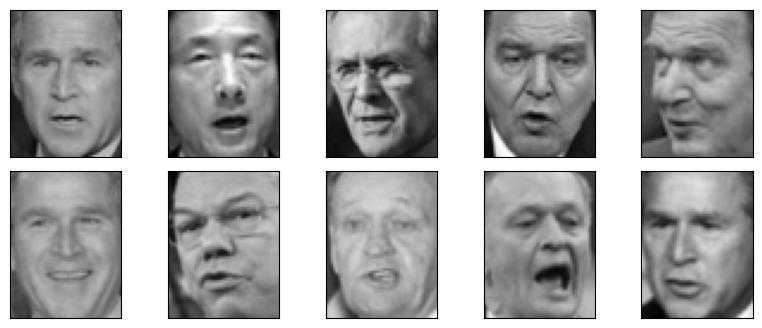

In [38]:
# Визуализация 10 изображений
def plot_digits(data):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i],
                  cmap='gray', clim=(0, 1))
                  
plot_digits(faces.images)

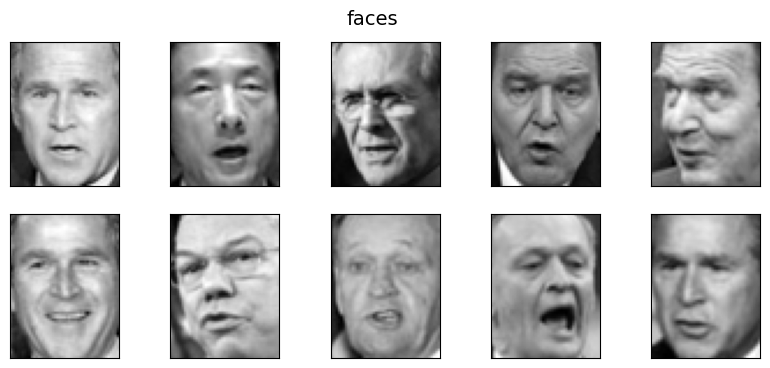

In [60]:

def plot_digits(data, suptitle):
    fig = plt.figure(figsize=(10, 4))
    fig.subplots_adjust(hspace=0.2, wspace=0.2, top=0.9)
    fig.suptitle(suptitle, fontsize=14)

    for i in range(10):
        ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])    
        ax.imshow(data[i], cmap="gray")
plot_digits(faces.images, "faces")

In [62]:
x, y, z = faces.images.shape
image_2d = faces.images.reshape(x*y, z)
image_2d.shape

(90272, 47)

In [66]:
from scipy import ndimage
from sklearn import cluster
kmeans_cluster = cluster.KMeans(n_clusters=7, n_init=5)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

In [ ]:
sk_kmeans_pred_res = kmeans_cluster.predict(image_2d)

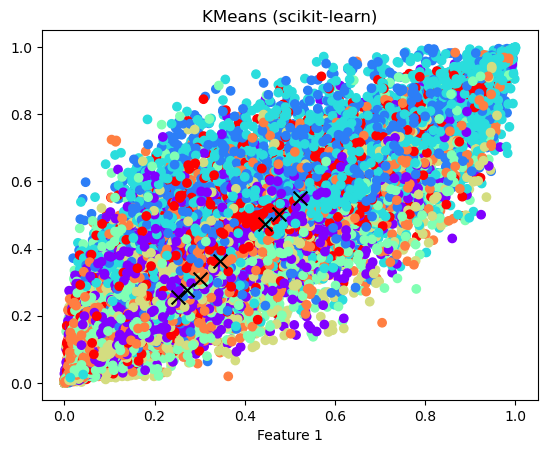

In [72]:
plt.scatter(image_2d[:, 0], image_2d[:, 1], c=sk_kmeans_pred_res, cmap="rainbow")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="x", color="black", s=100)
plt.title("KMeans")
plt.show()

In [5]:
# Используем TSNE
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(faces.data)

Text(0.5, 0, 't-SNE признак 1')

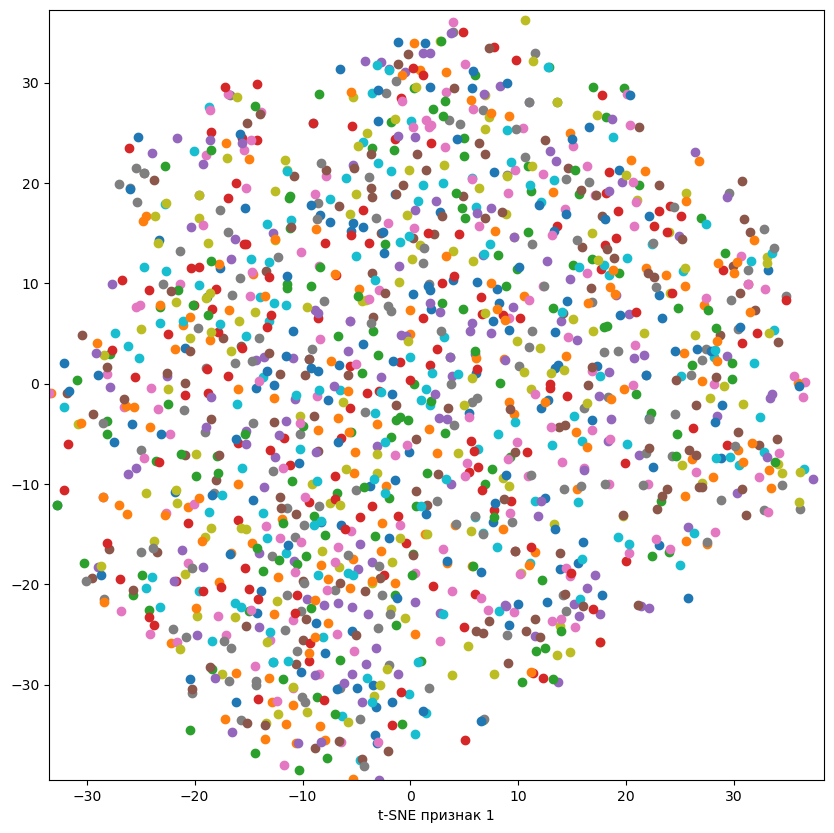

In [9]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(c.data)):     
    plt.scatter(digits_tsne[i, 0], digits_tsne[i, 1])
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")

Text(0.5, 0, 't-SNE признак 1')

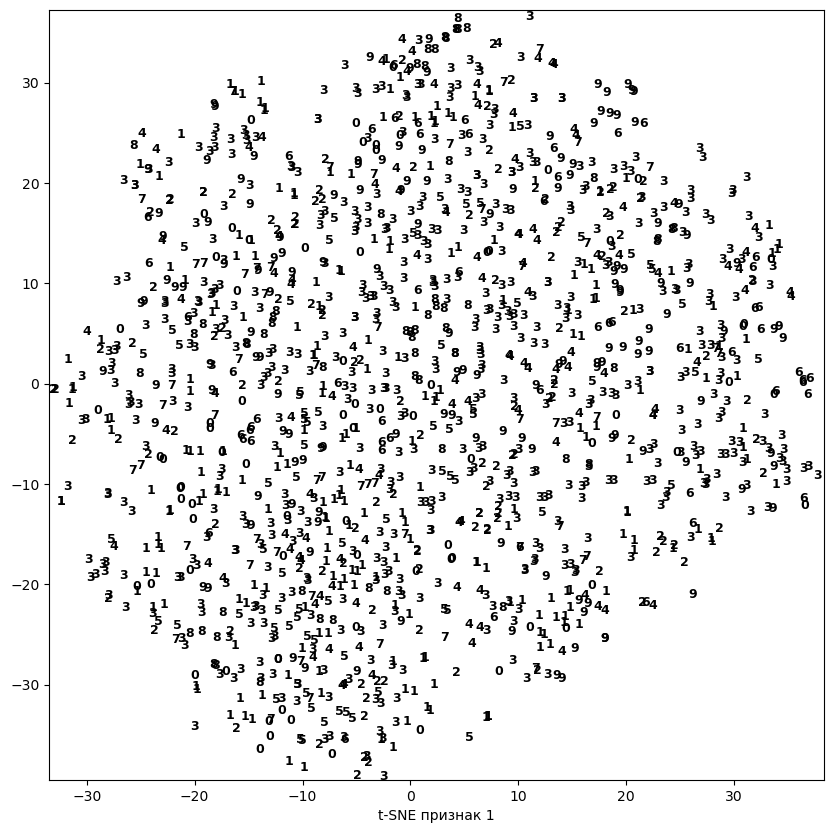

In [15]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(faces.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(faces.target[i]),        
        fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")
 


6